# Causes of Death Analysis_Preparation for Tableau report

## Table of Contents
### 1. Import Visualization Libraries and Data
### 2. Data Cleaning Wrangling, and Visualizing

## 1. Import Visualization Libraries and Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Ensure the created charts are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
#Create a path
path=r'C:\Users\midov\Documents\Studies\Data Analysis\Immersion into Data Analytics\Achievement 6_Advanced Analytics & Dashboard Design\Causes of Death Analysis'

In [4]:
#Import "causes_of_deaths.csv" file as df_causes, using path variable
df_causes=pd.read_csv(os.path.join(path,'Data','Prepared Data','df_merged_all3.csv'))

## 2. 2. Data Cleaning Wrangling, and Visualizing

In [5]:
df_causes.shape

(6144, 41)

In [6]:
df_causes.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Meningitis',
       'Alzheimer_s_Disease_and_Other_Dementias', 'Parkinson_s_Disease',
       'Nutritional_Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal_Violence', 'Maternal_Disorders', 'HIV_AIDS',
       'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases',
       'Lower_Respiratory_Infections', 'Neonatal_Disorders',
       'Alcohol_Use_Disorders', 'Self_harm', 'Exposure_to_Forces_of_Nature',
       'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure',
       'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus',
       'Chronic_Kidney_Disease', 'Poisonings', 'Protein_Energy_Malnutrition',
       'Road_Injuries', 'Chronic_Respiratory_Diseases',
       'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases',
       'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis', 'Total_no_of_Deaths',
       'Indicator', 'Sex', 'Age Group', 'Number', 'Death_indicator',
       'Health_expedinture'],
      dtype='o

In [7]:
#Divide the causes of death into 3 main categories: Communicable diseases, Non-communicable diseases, Injures

df_communicable_diseases = df_causes[["Year", "Nutritional_Deficiencies", "Malaria", "Maternal_Disorders", "HIV_AIDS","Drug_Use_Disorders","Tuberculosis","Neonatal_Disorders","Alcohol_Use_Disorders","Diarrheal_Diseases"]]

df_non_communicable_diseases = df_causes[["Year", "Meningitis","Alzheimer_s_Disease_and_Other_Dementias", "Parkinson_s_Disease", 
"Cardiovascular_Diseases","Lower_Respiratory_Infections", "Acute_Hepatitis", "Digestive_Diseases", "Cirrhosis_and_Other_Chronic_Liver_Diseases", 
"Chronic_Respiratory_Diseases", "Diabetes_Mellitus","Chronic_Kidney_Disease"]]

df_injures = df_causes[["Year","Drowning", "Interpersonal_Violence", "Fire_Heat_and_Hot_Substances", "Road_Injuries", "Poisonings" ,
"Protein_Energy_Malnutrition", "Conflict_and_Terrorism", "Self_harm", "Exposure_to_Forces_of_Nature", 
"Environmental_Heat_and_Cold_Exposure"]]

In [8]:
df_communicable_diseases = df_communicable_diseases.assign(sumRow = df_communicable_diseases.sum(axis=1) - df_communicable_diseases['Year']) 
sum_by_year_df_communicable_diseases = df_communicable_diseases[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

df_non_communicable_diseases = df_non_communicable_diseases.assign(sumRow = df_non_communicable_diseases.sum(axis=1) - df_non_communicable_diseases['Year'])
sum_by_year_df_non_communicable_diseases = df_non_communicable_diseases[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

df_injures = df_injures.assign(sumRow = df_injures.sum(axis=1) - df_injures['Year']) 
sum_by_year_df_injures = df_injures[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)
sum_by_year_df = sum_by_year_df_communicable_diseases.merge(sum_by_year_df_non_communicable_diseases, on='Year').merge(sum_by_year_df_injures,on='Year')
sum_by_year_df.rename(columns={'sumRow_x': 'Communicable_Diseases', 'sumRow_y': 'Non_Communicable_Diseases', 'sumRow': 'Injures'}, inplace=True)

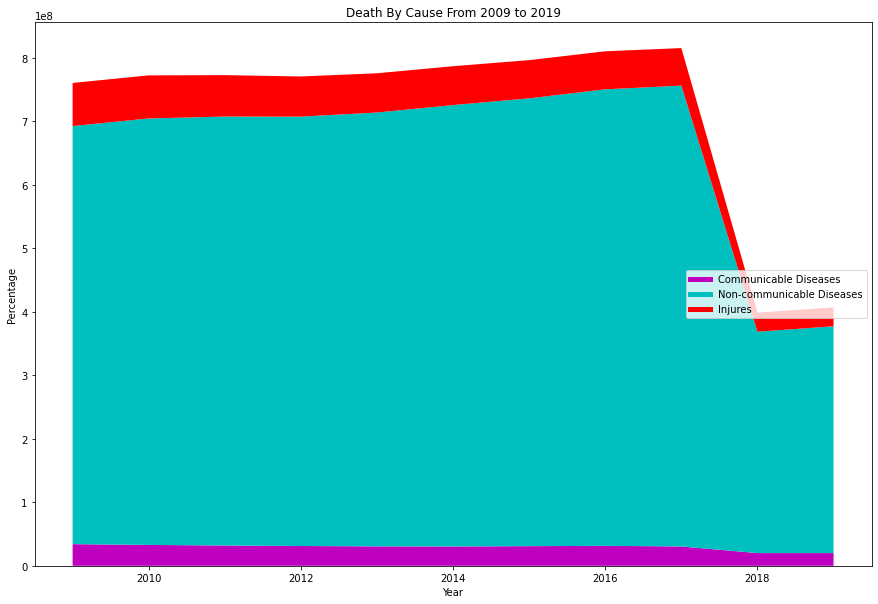

In [9]:
sum_by_year_copy=sum_by_year_df.copy()
total_sum_by_year = sum_by_year_copy.sum(axis = 1) - sum_by_year_copy['Year']
sum_by_year_copy['Communicable_Diseases'] = (sum_by_year_copy['Communicable_Diseases']*100/total_sum_by_year).round(2)
sum_by_year_copy['Non_Communicable_Diseases'] = (sum_by_year_copy['Non_Communicable_Diseases']*100/total_sum_by_year).round(2)
sum_by_year_copy['injures'] = 100 - sum_by_year_copy['Communicable_Diseases'] - sum_by_year_copy['Non_Communicable_Diseases']

plt.rcParams['figure.figsize'] = [15, 10]
 
# Stackplot

plt.plot([],[],color='m', label='Communicable Diseases', linewidth=5)
plt.plot([],[],color='c', label='Non-communicable Diseases', linewidth=5)
plt.plot([],[],color='r', label='Injures', linewidth=5)

plt.stackplot(sum_by_year_df['Year'],
                sum_by_year_df['Communicable_Diseases'], 
              sum_by_year_df['Non_Communicable_Diseases'], 
              sum_by_year_df['Injures'], 
             colors=['m','c','r'])
 
plt.xlabel('Year')
 
plt.ylabel('Percentage')
 
#Title of Graph
plt.title('Death By Cause From 2009 to 2019')
plt.legend(loc='center right')

# Displaying Graph
plt.show()

##### During the 10 years from 2009 to 2019,  for the countries analized (Australia, Brazil, Canada, China, Egypt, Germany, Mexico, Russia, United Kingdom, United States of America) the following trends were observed:
The number of deaths from non-communicable diseases always accounts for the highest rate and tends to increase gradually.
The number of deaths from communicable diseases accounts for the lowest rate, and maintains a fairly stable number over the years.
The number of deaths from injures accounts for a high rate, but tends to decrease.

In [10]:
#Drop the year column
df_no_year = df_causes.drop('Year',axis=1).groupby('Country').sum().reset_index()

In [11]:
overall = df_no_year[['Country','Total_no_of_Deaths']].sort_values('Total_no_of_Deaths',ascending =False)[:10]

Text(0.5, 1.0, 'OVERALL DISEASE MORTALITY ACROSS COUNTRIES ANALYZED')

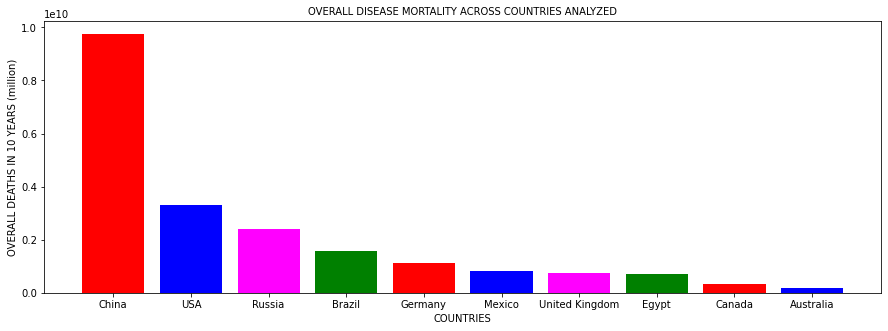

In [12]:
plt.figure(figsize = (15,5))
plt.bar(data=overall , x="Country" , height="Total_no_of_Deaths" , color = ['red','blue', 'magenta', 'green'])
plt.xlabel("COUNTRIES" ,size = 10)
plt.ylabel("OVERALL DEATHS IN 10 YEARS (million)" , size =10)
plt.title("OVERALL DISEASE MORTALITY ACROSS COUNTRIES ANALYZED",size=10)

##### What countries facing overall highest deaths due to diseases? - China, followed by USA and Russia.

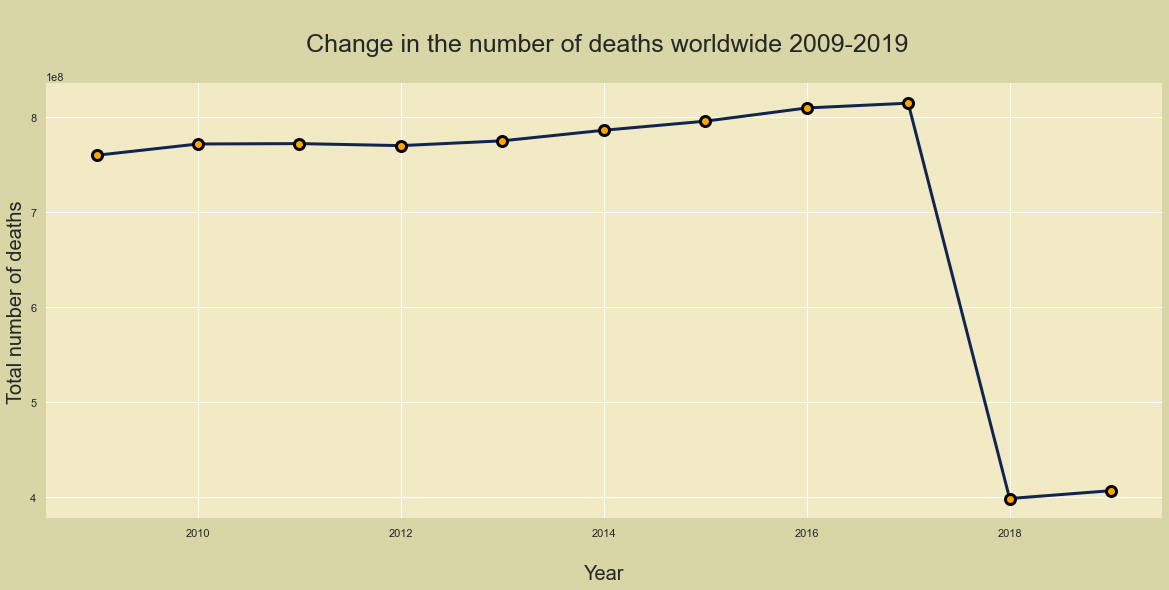

In [13]:
sum_by_year_df["Total"]=sum_by_year_df["Communicable_Diseases"]+sum_by_year_df["Non_Communicable_Diseases"]+sum_by_year_df["Injures"]

sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#D8D5A6"})
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=sum_by_year_df["Year"] ,y=sum_by_year_df["Total"],data=sum_by_year_df,color="#11264e",marker="o",linewidth=3,markersize=10,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\n Change in the number of deaths worldwide 2009-2019\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Total number of deaths",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

#####   Overall, there is a steep fall of all causes of deaths close to 2018, which is to be investigated. According to the previous analysis, the number of deaths in the world tends to increase each year, proportional to the population growth.

In [14]:
#Create a subset  of total number of deaths without year indication
Countries_Total_no_of_Deaths_noyear_df = df_causes.groupby('Country').sum()
Countries_Total_no_of_Deaths_noyear_df.drop('Year',axis=1,inplace=True)

In [15]:
#All countries: top 10 causes of deaths
top10causes = Countries_Total_no_of_Deaths_noyear_df.sort_values(by='Total_no_of_Deaths',ascending =False)[:1]

In [16]:
top10causes.iloc[0].sort_values(ascending=False)[1:11]

Cardiovascular_Diseases                       2.076771e+09
Neoplasms                                     1.211072e+09
Chronic_Respiratory_Diseases                  5.525626e+08
Road_Injuries                                 1.499937e+08
Digestive_Diseases                            1.421933e+08
Alzheimer_s_Disease_and_Other_Dementias       1.254022e+08
Lower_Respiratory_Infections                  9.275804e+07
Chronic_Kidney_Disease                        8.841561e+07
Cirrhosis_and_Other_Chronic_Liver_Diseases    7.911440e+07
Diabetes_Mellitus                             7.317278e+07
Name: China, dtype: float64

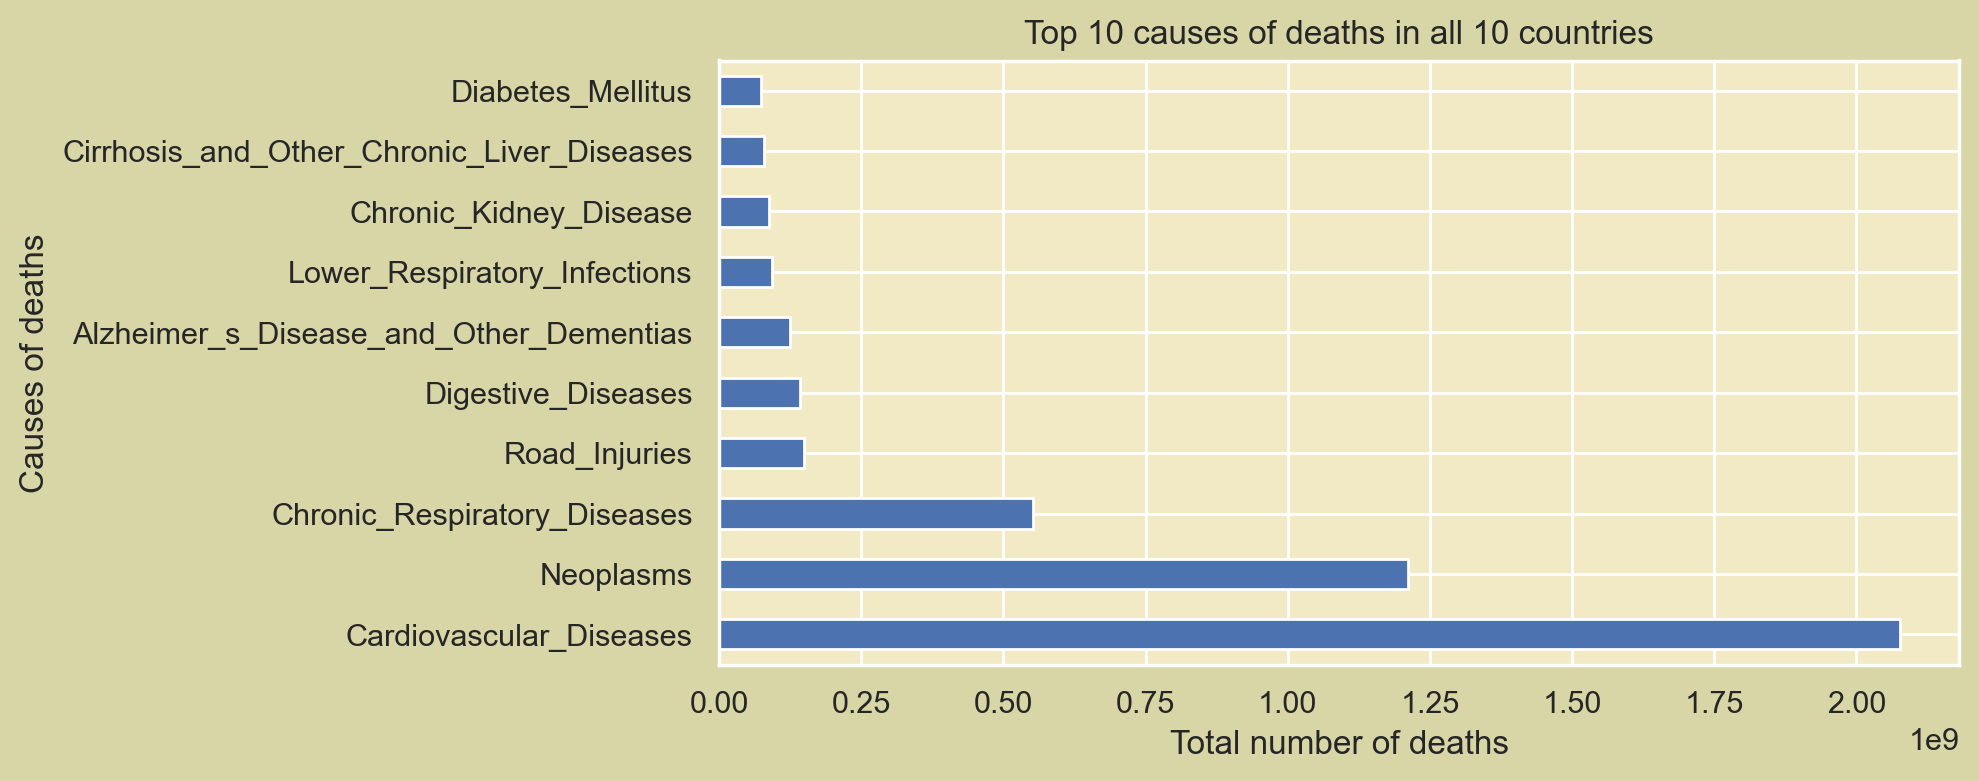

In [17]:
plt.figure(figsize=(8,4),dpi=200)
top10causes.iloc[0].sort_values(ascending=False)[1:11].plot(kind='barh')
plt.xlabel("Total number of deaths")
plt.ylabel("Causes of deaths")
plt.title("Top 10 causes of deaths in all 10 countries")
plt.show();

##### What are the top deadly causes/diseases in the countries analyzed? - Cardiovascular diseases, followed by Neoplasms and Chronic Respiratory diseases.

In [18]:
#Import "causes_of_deaths.csv" file as df_causes, using path variable
df_sexdiff=pd.read_csv(os.path.join(path,'Data','Prepared Data','df_merged_all3 - Copy.csv'))

In [19]:
Male_Deaths=['Male']

In [20]:
#Create a new column "Total male deaths" for individual Country and Year
df_sexdiff['Total_Male_Deaths'] = df_sexdiff[Male_Deaths].sum(axis=1)

In [21]:
#Create a new column "Total_of_Female_Death"  for individual Country and Year
Female_Deaths=['Female'] 
df_sexdiff['Total_Female_Deaths'] = df_sexdiff[Female_Deaths].sum(axis=1)

In [22]:
df_sexdiff.head(10)

,Unnamed: 0,Country,Year,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,...,Indicator,Sex,Male,Female,Age Group,Number,Death_indicator,Health_expedinture,Total_Male_Deaths,Total_Female_Deaths
0,21,Australia,2009,49,8064,1837,137,0,207,339,...,8.56,Male,1,None,[50-54],2515,Low,Middle,1,None
1,23,Australia,2009,49,8064,1837,137,0,207,339,...,8.56,Male,1,None,[55-59],3347,Low,Middle,1,None
2,25,Australia,2009,49,8064,1837,137,0,207,339,...,8.56,Male,1,None,[0],728,Low,Middle,1,None
3,26,Australia,2009,49,8064,1837,137,0,207,339,...,8.56,Male,1,None,[1-4],131,Low,Middle,1,None
4,27,Australia,2009,49,8064,1837,137,0,207,339,...,8.56,Male,1,None,[5-9],78,Low,Middle,1,None
5,28,Australia,2009,49,8064,1837,137,0,207,339,...,8.56,Male,1,None,[10-14],84,Low,Middle,1,None
6,29,Australia,2009,49,8064,1837,137,0,207,339,...,8.56,Male,1,None,[15-19],378,Low,Middle,1,None
7,30,Australia,2009,49,8064,1837,137,0,207,339,...,8.56,Male,1,None,[20-24],529,Low,Middle,1,None
8,31,Australia,2009,49,8064,1837,137,0,207,339,...,8.56,Male,1,None,[25-29],644,Low,Middle,1,None
9,32,Australia,2009,49,8064,1837,137,0,207,339,...,8.56,Male,1,None,[30-34],740,Low,Middle,1,None


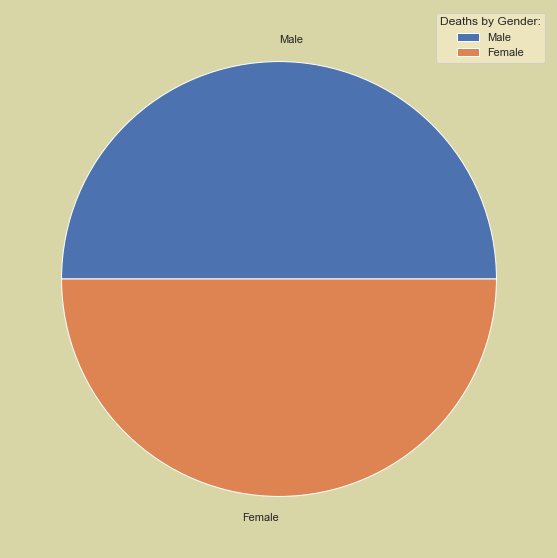

In [23]:
#Create pie chart for male/female 

y = np.array([2048, 2048])
mylabels = ["Male", "Female"]

plt.pie(y, labels = mylabels)
plt.legend(title = "Deaths by Gender:")
plt.show()  

###### We have an equal representation of the male and female deaths across the analyzed countries.

In [24]:
#Create a subset excluding the 'Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0', 'Sex', 'Age Group','Number' and 'Year' columns and 
#leaving only top ten causes of death.

subset = df_causes[['Alzheimer_s_Disease_and_Other_Dementias', 'Cardiovascular_Diseases',
       'Lower_Respiratory_Infections','Neoplasms', 'Diabetes_Mellitus',
       'Chronic_Kidney_Disease', 'Road_Injuries', 'Chronic_Respiratory_Diseases',
       'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases',
       'Total_no_of_Deaths','Country','Indicator']]

C:\Users\midov\AppData\Local\Temp\ipykernel_9836\82196868.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar() #add a colour legend (colorbar)


Text(0.5, 1.0, 'Correlation Matrix')

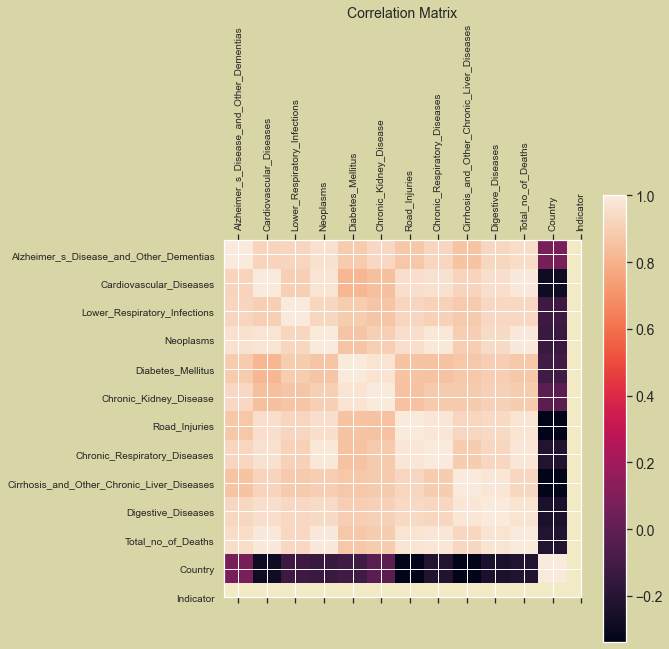

In [25]:
#Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) #figure size 
plt.matshow(subset.corr(), fignum=f.number) #type of plot
plt.xticks(range(subset.shape[1]), subset.columns, fontsize=10, rotation=90) #x axis labels
plt.yticks(range(subset.shape[1]), subset.columns, fontsize=10) #y axis labels
cb = plt.colorbar() #add a colour legend (colorbar)
cb.ax.tick_params(labelsize=14) #add font size
plt.title('Correlation Matrix', fontsize=14) #add title

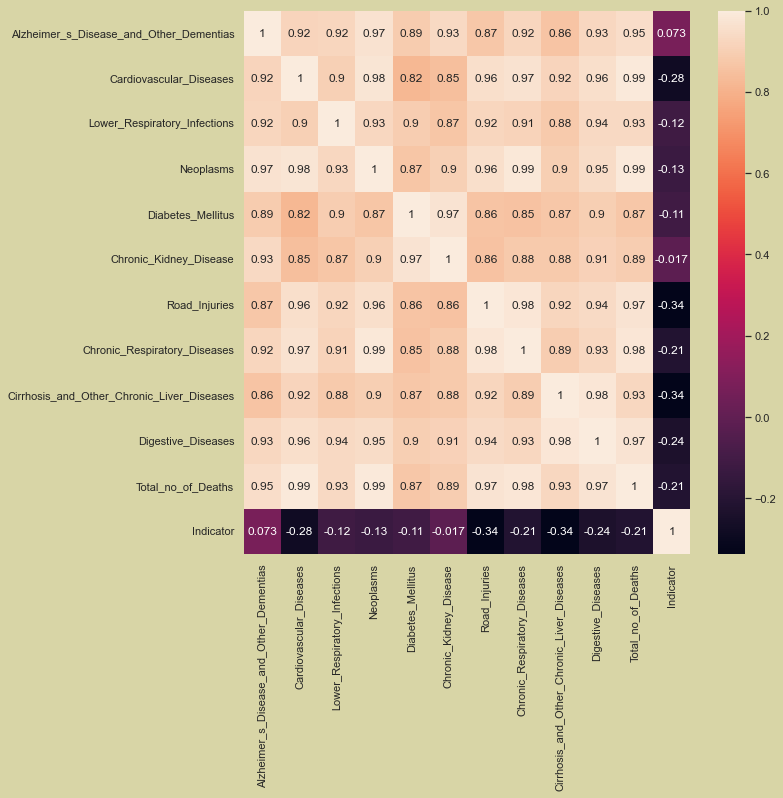

In [26]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
#Corelation heatmap in seaborn
corr = sns.heatmap(subset.corr(), annot = True, ax = ax)

##### 0: no relationship 0.1–0.3: weak relationship 0.3–0.5: moderate relationship 0.5–1.0: strong relationship

One may trace negative to weak correlation between the health expenditure (as % of GDP) on mortality rate. Meaning, the expenditure of government on health has no or low influences on causes of diseases. There is a strong relationship between the total number of deaths and the causes of deaths. For example, Chronic Respiratory, Digestive, Cardiovascular diseases, etc. have strong correlation with total number of deaths. Other examples of strong correlation: Road_injuries and Alzheimer_s_Disease_and_Other_Dementias. If a person is diagnosed with Alzheimer's disease, he/she has is more exposed to road accidents, and hence, he/she has more chances of road injuries.